In [2]:
'''ライブラリインポート'''
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
'''データ取得'''
data = pd.read_csv('./input/anime.tsv', delimiter='\t')
data.head(len(data))

,Title,despair,horror,grotesque,tears,commedy,daily,love,action,brain,unexpected
0,Steins;Gate,4,1,1,5,3,2,3,2,5,5
1,魔法少女まどか☆マギカ,5,1,3,5,1,2,3,4,3,5
2,Re:ゼロから始める異世界生活,4,1,5,4,3,1,4,4,3,4
3,進撃の巨人,5,2,5,3,1,1,1,5,3,5
4,ジョジョの奇妙な冒険,1,1,3,4,3,3,1,5,3,3
5,のんのんびより,1,1,1,2,4,5,2,1,1,1
6,化物語,1,1,4,3,5,3,5,3,3,3
7,東京喰種,4,2,5,3,1,1,2,5,3,3
8,ぼくらの,5,2,3,4,1,1,1,3,3,5
9,魔法使いの嫁,4,1,3,4,2,1,3,4,3,3


In [4]:
'''変数部分の抜き出し'''
titles = data['Title']
variables = data.loc[:, 'despair' : 'unexpected']

,2クラスタ
Title,
Steins;Gate,1
魔法少女まどか☆マギカ,1
Re:ゼロから始める異世界生活,1
進撃の巨人,1
ジョジョの奇妙な冒険,1
のんのんびより,0
化物語,0
東京喰種,1
ぼくらの,1


,3クラスタ
Title,
Steins;Gate,0
魔法少女まどか☆マギカ,1
Re:ゼロから始める異世界生活,1
進撃の巨人,1
ジョジョの奇妙な冒険,1
のんのんびより,2
化物語,2
東京喰種,1
ぼくらの,1


,4クラスタ
Title,
Steins;Gate,0
魔法少女まどか☆マギカ,1
Re:ゼロから始める異世界生活,1
進撃の巨人,1
ジョジョの奇妙な冒険,3
のんのんびより,2
化物語,3
東京喰種,1
ぼくらの,1


,5クラスタ
Title,
Steins;Gate,4
魔法少女まどか☆マギカ,0
Re:ゼロから始める異世界生活,0
進撃の巨人,0
ジョジョの奇妙な冒険,3
のんのんびより,1
化物語,2
東京喰種,0
ぼくらの,0


<Figure size 432x288 with 0 Axes>

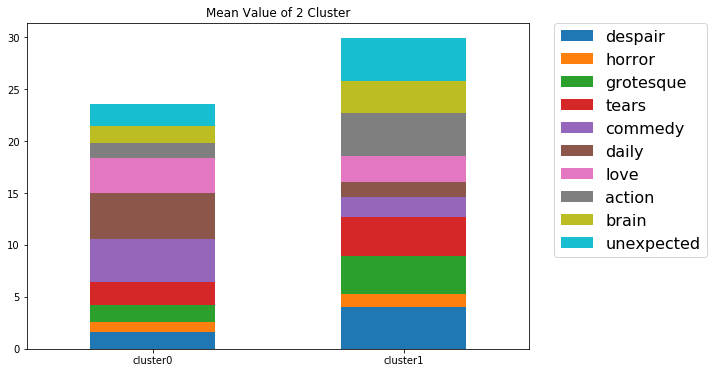

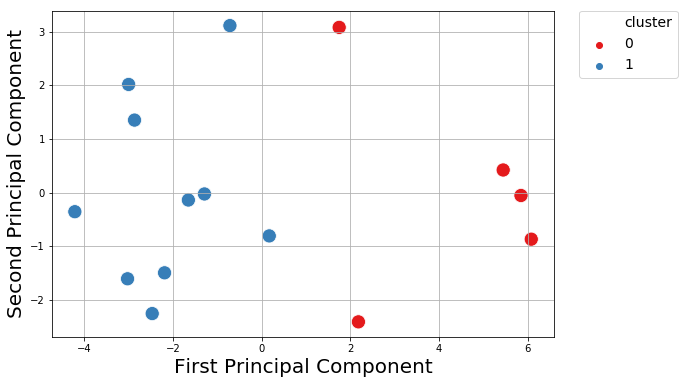

<Figure size 432x288 with 0 Axes>

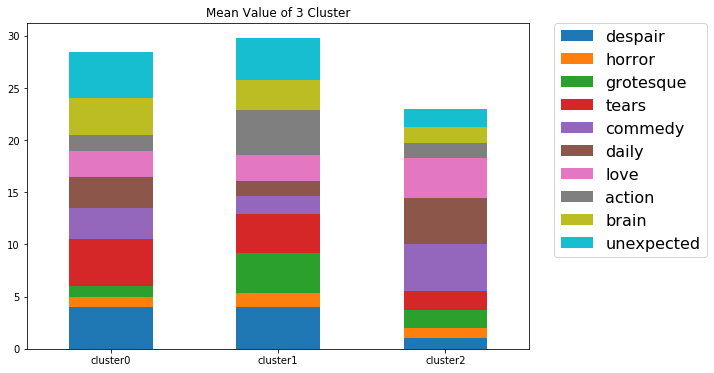

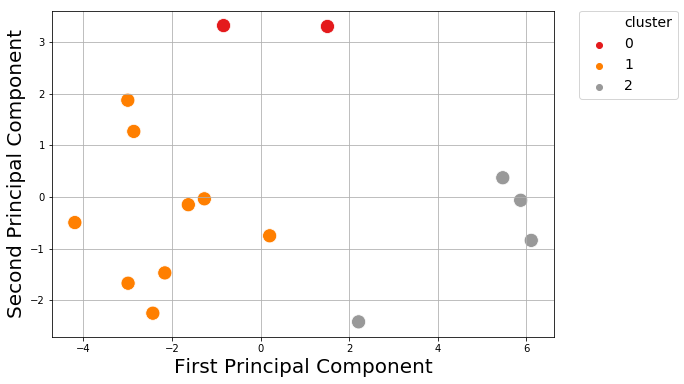

<Figure size 432x288 with 0 Axes>

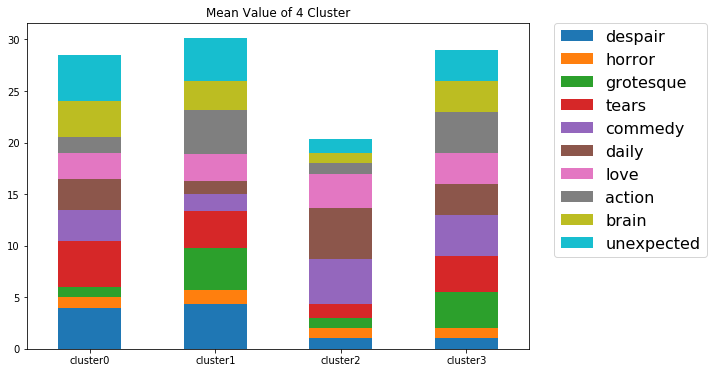

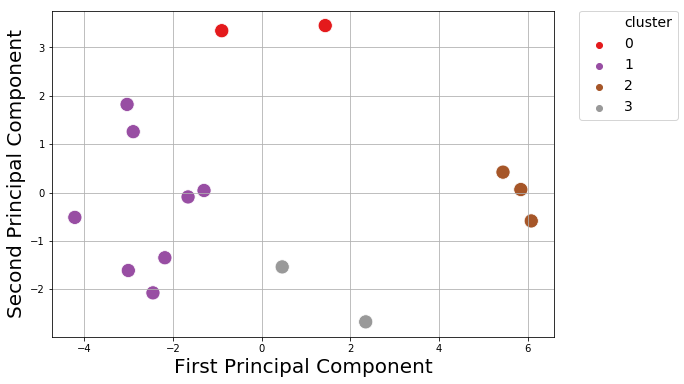

<Figure size 432x288 with 0 Axes>

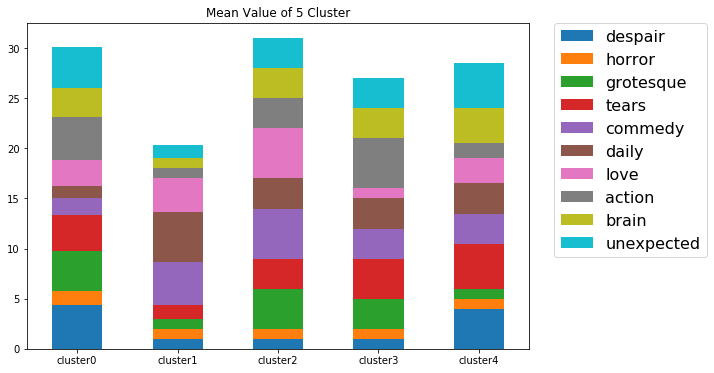

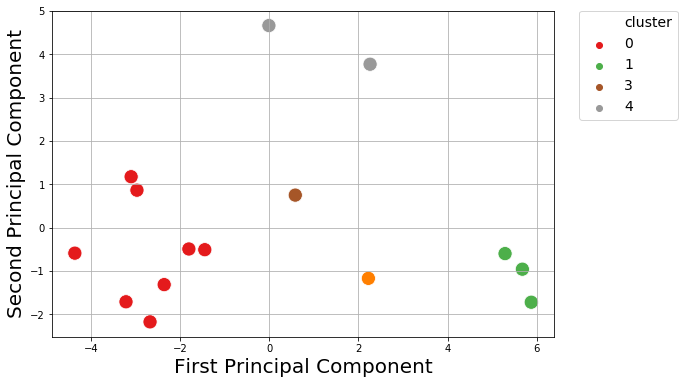

In [16]:
'''kmeans法でクラスタ分類'''
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(variables)
    variables['cluster'] = kmeans.labels_
    display(pd.DataFrame(kmeans.labels_, index=titles, columns=['{}クラスタ'.format(i)]))
    '''クラスタ毎の平均値をplot'''
    mean = pd.DataFrame()
    for j in range(i):
        mean['cluster' + str(j)] = variables[variables['cluster'] == j].mean()
    mean = mean.drop('cluster')
    plt.figure()
    plot = mean.T.plot(figsize=(9, 6), kind='bar', stacked=True, title='Mean Value of {} Cluster'.format(j+1))
    plot.set_xticklabels(plot.xaxis.get_majorticklabels(), rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
   
    '''主成分分析'''
    pca = PCA(n_components=2)
    pca.fit(variables)
    var_pca = pca.transform(variables)
    var_pca = pd.DataFrame(var_pca, columns=['First Principal Component', 'Second Principal Component'])
    var_pca['cluster'] = variables['cluster']
    fig = plt.figure(figsize=(9, 6))
    sns.scatterplot(x='First Principal Component', y='Second Principal Component', hue='cluster', palette="Set1", data=var_pca, s=200)
    plt.xlabel('First Principal Component', fontsize=20)
    plt.ylabel('Second Principal Component', fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
    plt.grid(True)